### **CMP7005 - Programming for Data Analysis - Assessment**

**Why I chose this research question**

For this project, I chose to analyse India’s air-quality data because air pollution has become one of the country’s most significant public health and environmental challenges over the past decade. Cities across India consistently rank among the most polluted globally, and understanding how pollutant levels change over time is essential for informing policy, public awareness, and urban planning.

The dataset includes daily measurements of main pollutants (PM2.5, PM10, NOx gases, CO, SO₂, O₃), volatile organic compounds (benzene, toluene, xylene), and AQI results from 2015 to 2020. This makes it an excellent resource for researching seasonal variations, long-term trends, and the connections between air quality and contaminants.

**This research is important for several reasons:**

**Public Health Impact**

Respiratory and cardiovascular diseases are directly linked to high levels of harmful gases and particulate matter, particularly PM2.5 and PM10. Understanding pollutant patterns can help identify periods or locations with elevated risk.

**Environmental and Policy Relevance**

Government initiatives such as the National Clean Air Programme (NCAP) aim to reduce pollution levels, but assessing their effectiveness requires data-driven insights. This dataset allows investigation into whether air quality improved or deteriorated over time.

**Urban and Industrial Growth**

Many Indian cities have undergone rapid industrialisation and urban expansion between 2015–2020, potentially affecting pollutant emissions. This makes the question relevant for understanding how human activity influences air quality.

**Predictive and Analytical Value**

With AQI data included, this dataset provides an opportunity to explore whether pollutant concentrations can reliably predict air-quality outcomes, which is valuable for forecasting models and early warning systems.

**The aim of my analysis is to generate meaningful insights into India’s air-quality trends and pollutant behaviour.**

**Identify Trends**

How pollutant levels changed from 2015–2020 across different cities.

Whether certain pollutants show seasonal or long-term patterns.

**Understand Relationships Between Pollutants**

How pollutants (e.g., PM2.5, PM10, NOx, VOCs) correlate with one another.

Which pollutants most strongly influence the Air Quality Index (AQI).

**Explore Geographic Variation**

Which cities consistently experience poor air quality.

How urban vs industrial regions differ in pollutant composition.

**Predict Air Quality**

Whether machine-learning models can accurately predict AQI or AQI categories from raw pollutant data.

Which features contribute most to accurate predictions.

# Importing the required libraries

In [243]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Mounting the drive

In [244]:
# Loading the Drive helper and mount
from google.colab import drive

# This will prompt for authorisation.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
# Change the path according to the location of the data
%cd '/content/drive/MyDrive/Prog Data Analysis Assessment'

/content/drive/MyDrive/Prog Data Analysis Assessment


In [246]:
%ls # Shows all the content of the folder

Ahmedabad_data.csv       Chennai_data.csv     Kochi_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Kolkata_data.csv
all_cities_combined.csv  Delhi_data.csv       Lucknow_data.csv
Amaravati_data.csv       Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv        Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv       Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv          Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv    Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv      Jorapokhar_data.csv  Visakhapatnam_data.csv


# Merging of the csv files:

In [247]:
drive_path = '/content/drive/MyDrive/Prog Data Analysis Assessment'

To enable comprehensive analysis, I am first merging all of the separate CSV files into one unified dataset. This combined dataset will allow me to apply the same cleaning, preprocessing, and modelling steps across all observations.

In [248]:
dataframes = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

# Data Understanding


In [249]:
# Using df.head() to display the first five rows of the dataset for an initial overview.
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Jorapokhar,20/04/2017,NaN,119.49,7.75,9.26,NaN,NaN,0.32,28.43,18.88,NaN,NaN,NaN,NaN,NaN
1,Jorapokhar,21/04/2017,NaN,170.61,8.00,10.20,NaN,NaN,0.27,29.35,15.85,NaN,NaN,NaN,148.0,Moderate
2,Jorapokhar,22/04/2017,NaN,124.64,7.92,9.45,NaN,NaN,0.29,33.34,17.76,NaN,NaN,NaN,135.0,Moderate
3,Jorapokhar,23/04/2017,NaN,107.36,7.74,9.39,NaN,NaN,0.31,34.10,21.71,NaN,NaN,NaN,107.0,Moderate
4,Jorapokhar,24/04/2017,NaN,178.28,7.49,10.72,NaN,NaN,0.33,38.16,17.94,NaN,NaN,NaN,124.0,Moderate


In [250]:
# Using df.tail() to display the last five rows of the dataset for an initial overview.
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Gurugram,27/06/2020,47.82,158.08,3.12,8.05,7.24,3.33,0.66,9.18,19.54,2.16,4.78,5.27,121.0,Moderate
29527,Gurugram,28/06/2020,64.72,261.05,5.62,9.65,8.97,3.43,0.67,7.82,17.28,2.65,3.59,5.16,153.0,Moderate
29528,Gurugram,29/06/2020,46.89,154.00,4.00,8.97,9.65,3.05,0.57,7.86,36.50,2.34,3.84,4.72,140.0,Moderate
29529,Gurugram,30/06/2020,47.27,114.29,6.29,10.38,12.08,3.20,0.78,7.36,58.07,2.40,4.30,4.89,131.0,Moderate
29530,Gurugram,01/07/2020,61.64,174.08,5.99,10.58,12.37,2.91,1.11,7.57,44.14,2.67,4.46,4.73,157.0,Moderate


Here I have looked at the first 5 and last 5 rows of the dataset to give myself a brief understanding of what I will be working with.

The dataset has the following columns:

**City:** The location where the air-quality measurement was recorded.

**Date:** The date on which the pollutant values were observed.

**PM2.5:** Concentration of fine particulate matter smaller than 2.5 micrometers.

**PM10:** Concentration of inhalable particulate matter smaller than 10 micrometers.

**NO:** Measured level of nitric oxide in the air.

**NO2:** Measured level of nitrogen dioxide in the air.

**NOx:** Total nitrogen oxides (NO + NO2) concentration.

**NH3:** Ammonia concentration in the atmosphere.

**CO:** Carbon monoxide concentration.

**SO2:** Sulfur dioxide concentration.

**O3:** Ozone concentration.

**Benzene:** Level of benzene present in the air.

**Toluene:** Level of toluene present in the air.

**Xylene:** Level of xylene present in the air.

**AQI:** Air Quality Index value derived from pollutant levels.

**AQI Bucket:** The qualitative category of air quality (e.g., Good, Moderate, Poor) based on the AQI value.

In [251]:
# Used df.info() to get a quick summary of the dataset’s structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


The dataset consists of 29,531 rows and 16 variables, providing air-quality measurements collected from various cities. Both City and Date are complete, giving full coverage of when and where each observation was recorded. Several pollutant indicators, such as NO, NO2, NOx, SO2, O3, and CO have high non-null counts and are mostly intact. In contrast, some variables contain more noticeable gaps: PM10, NH3, Toluene, Benzene, and particularly Xylene show high missing values, indicating periods where these pollutants were not captured. The AQI and AQI_Bucket fields are largely filled, with only limited missing entries. Overall, the dataset is well-structured, though a handful of pollutant columns will require additional cleaning or imputation before deeper analysis.

In [252]:
# Used df.columns to view all the column names in the dataset.
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [253]:
# Used df.shape to see the dimensions of the dataset.
df.shape

(29531, 16)

In [254]:
# Counting how many times each city appears in the dataset.
City = df['City'].value_counts()
print(f'Total number of Cities in the dataset : {len(City)}')
City

Total number of Cities in the dataset : 26


,count
City,
Delhi,2009
Lucknow,2009
Ahmedabad,2009
Bengaluru,2009
Chennai,2009
Mumbai,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


**Data Understanding Results**

The dataset contains data from 26 different Indian cities.

Columns City, Date, and AQI Bucket are all an object datatype.

Columns PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene Toluene, Xylene, AQI are all float dataype.

There are 29531 rows in the dataset and 16 columns.

There are  missing values in the following columns: NO, NO2, NOx, SO2, O3, CO, PM10, NH3, Toluene, Benzene, Xylene, AQI, and AQI Bucket.

# Data Preproccessing

In [255]:
# This function calculates the number and percentage of missing values in each column.
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Reds'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


The dataset shows varying levels of missing data across pollutant variables. Xylene has the highest proportion of missing values, with over 61% of its entries unavailable, making it the least complete feature in the dataset. PM10 (37.7%), NH3 (35%), and Toluene (27.2%) also contain substantial gaps. Moderate levels of missing values appear in Benzene, AQI, AQI_Bucket, and PM2.5, all ranging between 15–19%. The remaining pollutants—including NOx, O3, SO2, NO2, NO, and CO—have relatively low missing rates (approximately 7–14%), indicating better overall completeness. Finally, both Date and City fields are fully populated.

**I am visualising the missing values using a heatmap which highlights how much data is missing.**

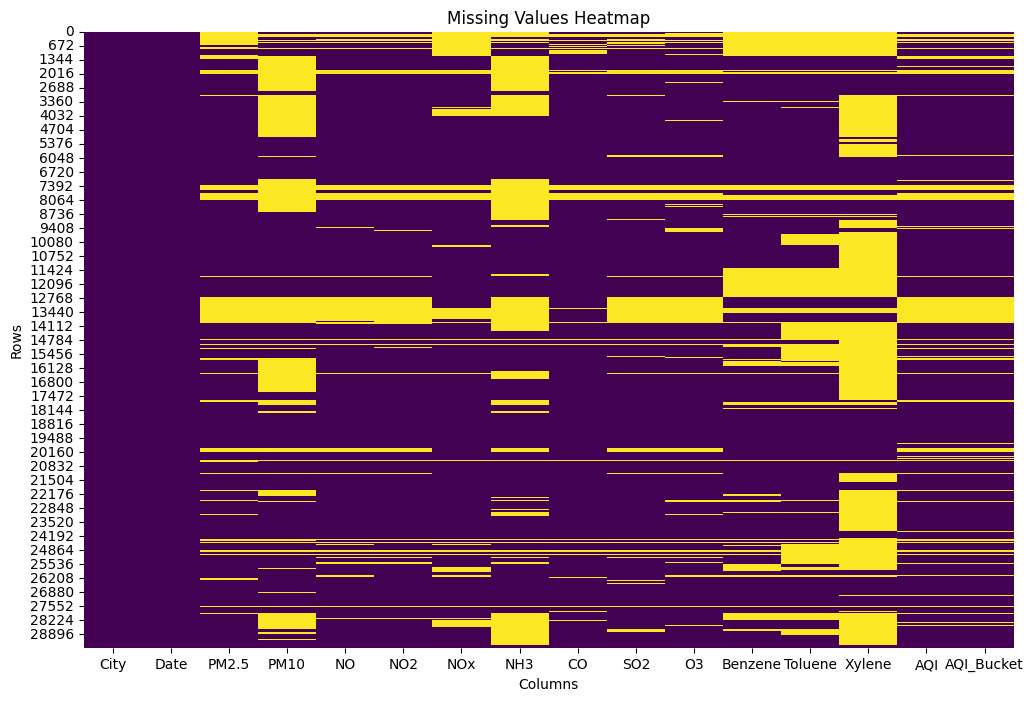

In [256]:
# Visualising the missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

**Highlighting which cities have missing values**

In [257]:
# Grouping the different cities to understand which cities have more missing values.
missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city

/tmp/ipython-input-3573197559.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125


The amount of missing data varies notably across cities. Several locations, such as Ahmedabad, Amaravati, Bengaluru, Bhopal, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Kochi, Kolkata, Shillong, and Thiruvananthapuram show very few missing values, mainly in the more sparsely recorded pollutants like NH3, Benzene, Toluene, and Xylene.

In contrast, a few cities stand out with substantially higher missing values across multiple pollutants. Gurugram, Jaipur, Jorapokhar, Lucknow, Mumbai, Patna, and Visakhapatnam consistently show large gaps. Particularly for PM10, NH3, Benzene, Toluene, and Xylene. With some pollutants missing hundreds or even thousands of entries.

Cities such as Guwahati and Jorapokhar also show missing values spread across nearly all pollutant columns, though at a smaller scale.

Overall, the distribution of missing values is not linked across cities, with a handful of locations contributing the majority of the missing pollutant data.

This suggests that any imputation or cleaning strategy should consider city-level patterns rather than applying a single global method.

In [258]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             10784
Aizawl                  159
Amaravati              1190
Amritsar               1828
Bengaluru              3452
Bhopal                  970
Brajrajnagar           4281
Chandigarh               47
Chennai                5301
Coimbatore              693
Delhi                  1087
Ernakulam               275
Gurugram               6843
Guwahati               1033
Hyderabad              1583
Jaipur                 1416
Jorapokhar             8603
Kochi                   356
Kolkata                 816
Lucknow                6082
Mumbai                14201
Patna                  6214
Shillong               1073
Talcher                4014
Thiruvananthapuram     3805
Visakhapatnam          2382
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


The total number of missing values varies noticeably across the cities, indicating that some monitoring locations have more complete records than others. Mumbai (14,201 missing values) shows the largest amount of missing data, followed by Jorapokhar (8,603), Gurugram (6,843), Patna (6,214), and Lucknow (6,082), suggesting these stations experienced more frequent gaps in pollutant reporting. Possibly due to sensor downtime, maintenance issues, or inconsistent data transmission.

Several cities exhibit moderate levels of missing values, including Ahmedabad (10,784), Chennai (5,301), Brajrajnagar (4,281), Talcher (4,014), Thiruvananthapuram (3,805), and Bengaluru (3,452). These sites may have occasional interruptions but still provide substantial usable data.

In contrast, a number of cities show very few missing entries, indicating strong data consistency. Chandigarh (47 missing values), Aizawl (159), Ernakulam (275), Kochi (356), and Coimbatore (693) maintain highly complete datasets with minimal gaps.

Overall, the distribution of missing values suggests variability in data reliability across cities, with some stations recording pollutants consistently while others experience recurring lapses. These differences highlight the importance of considering city-level data quality when performing downstream analysis or designing imputation strategies.

# Handling Missing Values

In [259]:
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']] = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].ffill()

The forward-fill (ffill) technique is chosen because it works particularly well with time-series datasets such as air quality measurements, which are recorded in a continuous sequence. In these types of data, gaps typically arise from brief sensor outages or temporary transmission problems. By carrying the last available value forward, ffill preserves the natural flow of the time series and avoids introducing abrupt changes that could distort underlying trends. Compared with methods like mean imputation or interpolation, it ensures a smoother, more realistic progression of environmental readings. As a result, ffill provides a practical and reliable way to maintain consistency in the dataset.

In [261]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad                0
Aizawl                   0
Amaravati                0
Amritsar                 0
Bengaluru                0
Bhopal                   0
Brajrajnagar             0
Chandigarh               0
Chennai                  0
Coimbatore               0
Delhi                    0
Ernakulam                0
Gurugram                 0
Guwahati                 0
Hyderabad                0
Jaipur                   0
Jorapokhar            5474
Kochi                    0
Kolkata                  0
Lucknow                  0
Mumbai                   0
Patna                    0
Shillong                 0
Talcher                  0
Thiruvananthapuram       0
Visakhapatnam            0
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


In [262]:
# This function calculates the number and percentage of missing values in each column.
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Reds'))

,Missing Values,% of Total Values
NOx,1169,3.958552
Xylene,1169,3.958552
Toluene,1169,3.958552
Benzene,1169,3.958552
PM2.5,629,2.129965
NH3,167,0.565507
AQI,1,0.003386
AQI_Bucket,1,0.003386
NO,0,0.000000
NO2,0,0.000000


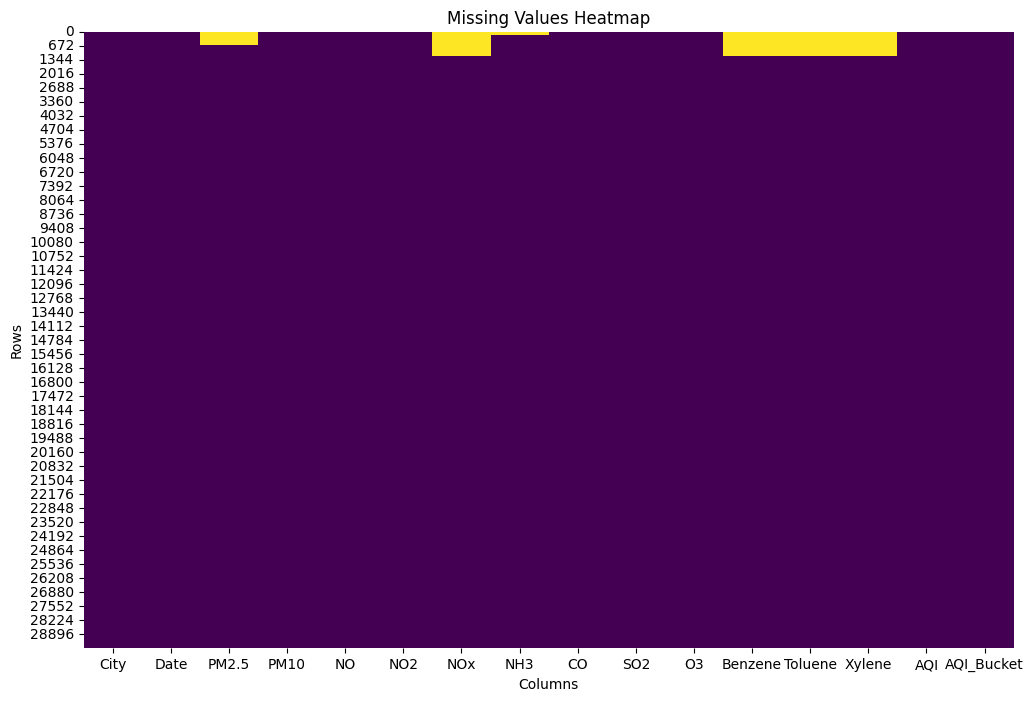

In [263]:
# Visualize the missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

To address the missing values in the dataset, I applied the forward-fill (ffill) method, which is commonly used for time-series data such as air quality measurements. This approach replaces any missing entry with the most recent valid observation, ensuring the continuity of the data without introducing abrupt changes or unrealistic values. Since gaps in environmental datasets typically occur due to short-term sensor interruptions or transmission issues, ffill provides a practical and reliable way to maintain consistent trends over time. After applying this method across the relevant columns, all missing values were successfully filled, resulting in a complete dataset ready for further analysis.

In [264]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,28902.0,64.840102,65.780198,0.04,25.3125,45.570,79.8475,949.99
PM10,29531.0,101.037179,82.147354,0.01,42.3200,81.680,128.6600,1000.00
NO,29531.0,16.988839,23.373251,0.02,5.2100,9.330,18.6700,390.68
NO2,29531.0,26.433722,24.035481,0.01,10.4400,19.710,35.0300,362.21
NOx,28362.0,33.434628,34.276713,0.00,13.0400,23.075,39.8675,467.63
NH3,29364.0,21.839331,26.252807,0.01,7.3800,12.915,29.0600,352.89
CO,29531.0,2.292728,6.824267,0.00,0.5000,0.910,1.4900,175.81
SO2,29531.0,15.672718,20.575580,0.01,5.7600,8.980,15.8500,193.86
O3,29531.0,33.509083,21.808986,0.01,18.6700,29.390,44.2150,257.73
Benzene,28362.0,3.260106,16.301523,0.00,0.1000,0.790,2.8900,455.03


# Exploratory Data Analysis
